<a href="https://colab.research.google.com/github/iamabhaydawar/learn_mL/blob/main/mL_ucla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [34]:
cols =["fLength","fWitch","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df=pd.read_csv(
   "magic04.data",names=cols
)
df.head()

,fLength,fWitch,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [35]:
df["class"] =(df['class'] == "g").astype(int)

In [14]:
df.head()

,fLength,fWitch,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


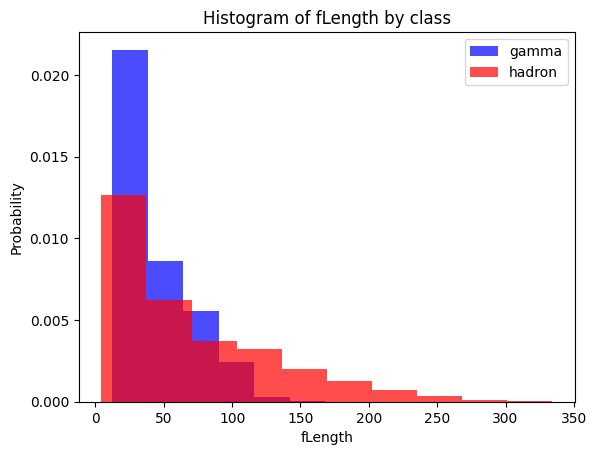

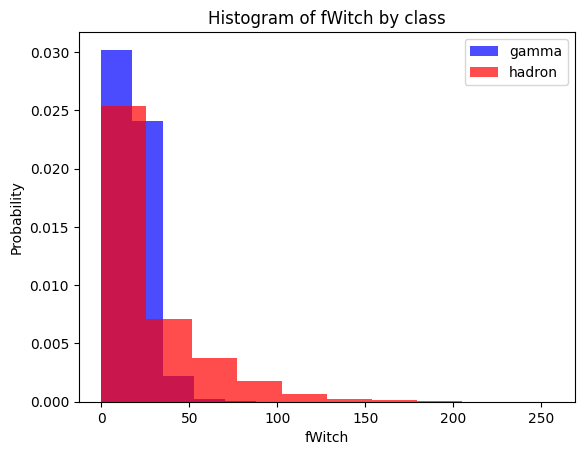

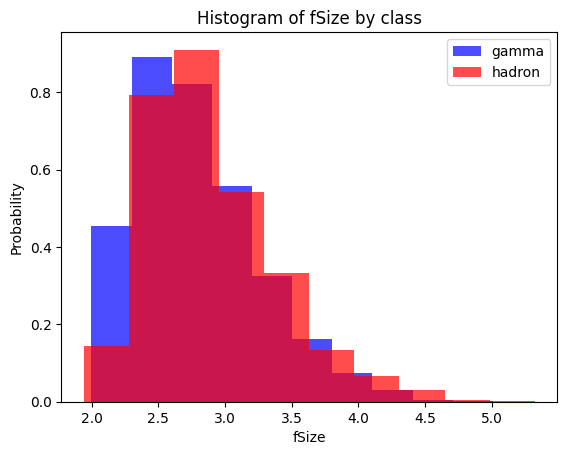

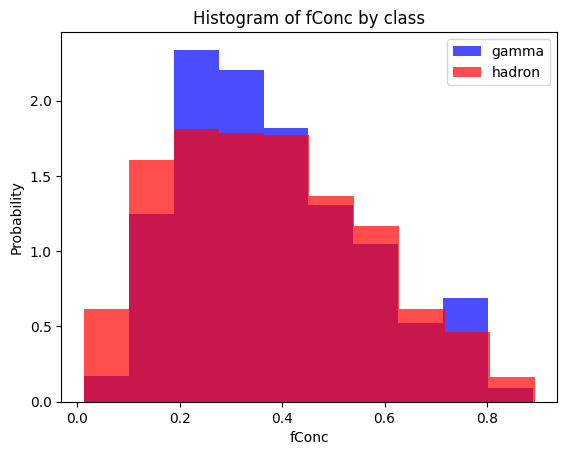

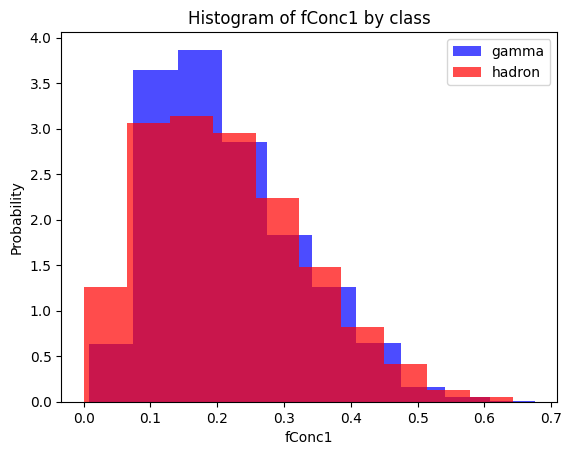

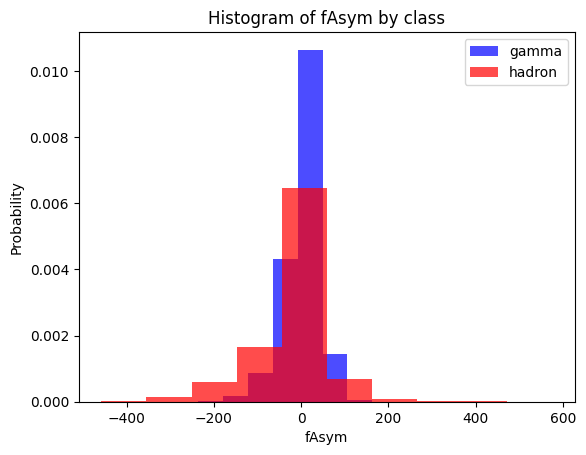

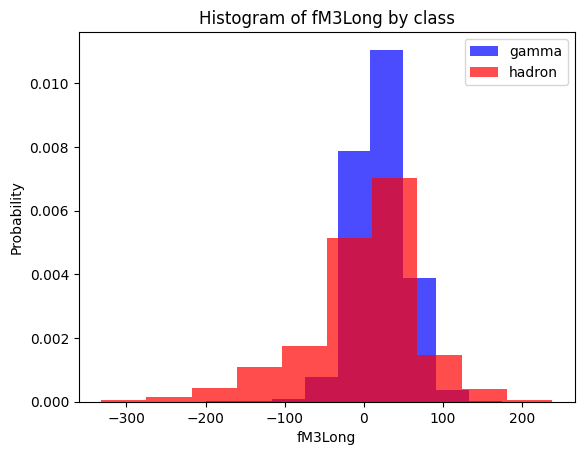

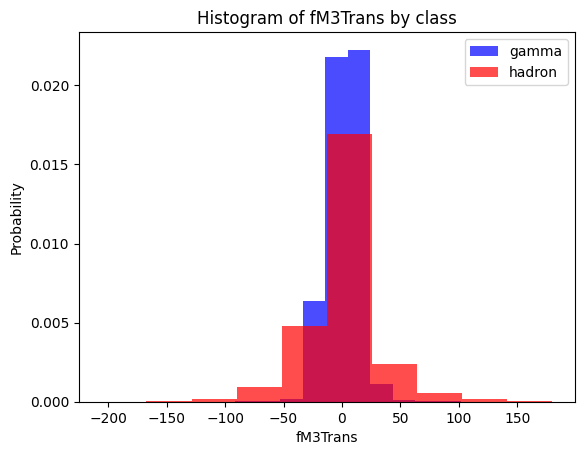

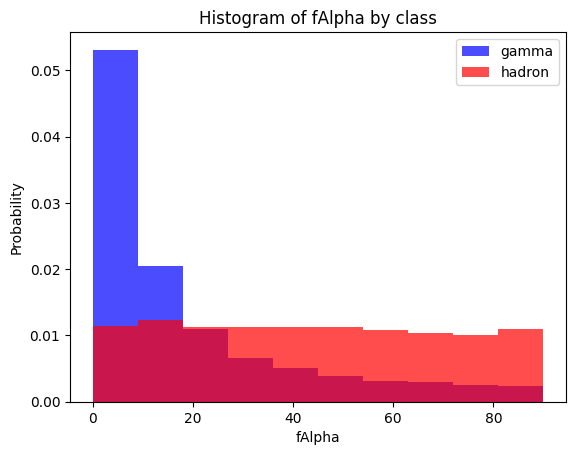

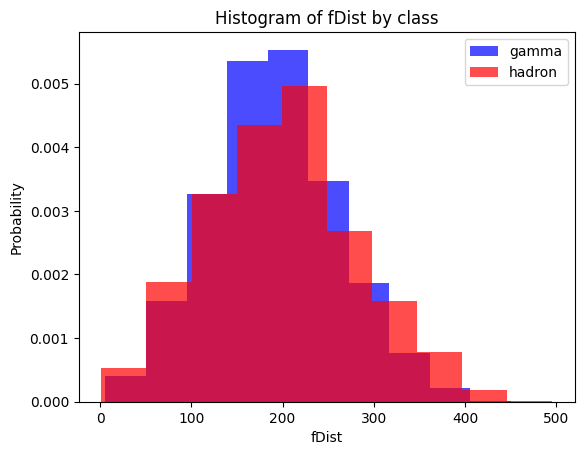

In [36]:
for label in cols[:-1]:  # loop over feature columns, not the class column
    plt.hist(df[df["class"] == 1][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df["class"] == 0][label], color='red', label='hadron', alpha=0.7, density=True)
    plt.title(f'Histogram of {label} by class')
    plt.xlabel(label)
    plt.ylabel('Probability')
    plt.legend()
    plt.show()


# Train,Validation and test datasets

In [123]:
y_train,valid,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [124]:
def scale_dataset(dataframe, oversample=False):
  x=dataframe[dataframe.columns[:-1]].values
  y=dataframe[dataframe.columns[-1]].values

  scaler= StandardScaler()
  x=scaler.fit_transform(x)

  if oversample:
    ros=RandomOverSampler()
    x,y=ros.fit_resample(x,y)

  data=np.hstack((x,np.reshape(y,(-1,1))))
  return data,x,y

In [125]:
len(train)

11412

In [126]:
len(y_train)

11412

In [127]:
train_data, x_train, y_train = scale_dataset(train, oversample=True)
valid_data, x_valid, y_valid = scale_dataset(valid, oversample=False)
test_data, x_test, y_test = scale_dataset(test, oversample=False)

K-nearest neighbours %KNN

In [128]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [130]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [131]:
y_pred=knn_model.predict(x_test)

In [132]:
y_pred

array([1, 0, 0, ..., 1, 1, 1])

In [133]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1354
           1       0.91      0.90      0.91      2450

    accuracy                           0.88      3804
   macro avg       0.87      0.87      0.87      3804
weighted avg       0.88      0.88      0.88      3804



# Naive Bayes

In [134]:
 from sklearn.naive_bayes import GaussianNB

In [135]:
nb_model=GaussianNB()
nb_model=nb_model.fit(x_train,y_train)

In [136]:
y_pred=nb_model.predict(x_test)

In [137]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.42      0.52      1354
           1       0.74      0.89      0.81      2450

    accuracy                           0.72      3804
   macro avg       0.71      0.66      0.66      3804
weighted avg       0.72      0.72      0.70      3804



# linear regression